In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = iris["data"][: ,2:3]
y=(iris["target"]==0).astype(np.int)

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
X_new = np.linspace(0,10,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1]<=0.5][0]

In [7]:
y_proba

array([[3.62519819e-04, 9.99637480e-01],
       [3.73265556e-04, 9.99626734e-01],
       [3.84329693e-04, 9.99615670e-01],
       ...,
       [9.99999999e-01, 6.13413548e-10],
       [9.99999999e-01, 5.95747918e-10],
       [9.99999999e-01, 5.78591040e-10]])

In [8]:
decision_boundary

array([2.72272272])

In [9]:
log_reg.predict([[5.7],[1.5]])

array([0, 1])

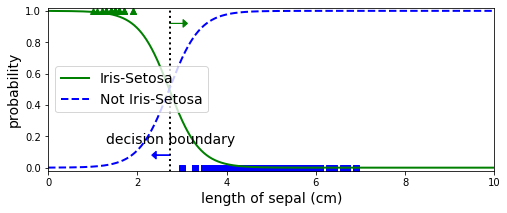

In [10]:
plt.figure(figsize=(8,3))
plt.plot(X[y==0],y[y==0],"bs")
plt.plot(X[y==1],y[y==1],"g^")
plt.plot([decision_boundary, decision_boundary],[-1,2],"k:",linewidth=2)
plt.plot(X_new,y_proba[:,1],"g-",linewidth=2, label="Iris-Setosa")
plt.plot(X_new,y_proba[:,0],"b--",linewidth=2, label="Not Iris-Setosa")
plt.text(decision_boundary+0.02, 0.15, "decision boundary",fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b',ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g',ec='g')
plt.xlabel("length of sepal (cm)", fontsize=14)
plt.ylabel("probability",fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0,10,-0.02,1.02])
plt.show()

In [11]:
X=iris["data"]
y=iris["target"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

softmax_reg=LogisticRegression(multi_class="multinomial",C=10,random_state=42,max_iter=1000)
softmax_reg.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
expected_y=y_test
predicted_y=softmax_reg.predict(X_test)

print(); print(metrics.classification_report(expected_y,predicted_y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [13]:
print();print(metrics.confusion_matrix(expected_y,predicted_y))


[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(softmax_reg,X_train,y_train,cv=3,scoring="accuracy")

array([1.   , 0.975, 1.   ])

In [15]:
expected_y=y_test
predicted_y=softmax_reg.predict(X_test)

print(); print(metrics.classification_report(expected_y,predicted_y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
expected_y=y_test
predicted_y=clf.predict(X_test)

print(); print(metrics.classification_report(expected_y,predicted_y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [19]:
print();print(metrics.confusion_matrix(expected_y,predicted_y))


[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]
